In [1]:
import pandas as pd 
from pandas.plotting import scatter_matrix
import numpy as np
import json
from helpers import *
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sys.path.append("..")
from data.unlabeled.raw import hdro_inicator_values as inicator_values, hdro_country_name as country_name, hdro_indicator_name as indicator_name

..\data\unlabeled\raw\__init__.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  aquastat_eah = pd.read_csv(aquastat_eah_path, skipfooter=8)
..\data\unlabeled\raw\__init__.py:42: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  aquastat_wr = pd.read_csv(aquastat_wr_path, skipfooter=8)
..\data\unlabeled\raw\__init__.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  aquastat_wu = pd.read_csv(aquastat_wu_path, skipfooter=8)


In [5]:
#print(inicator_values)
#print(country_name)
#print(indicator_name)

### Unwrap values to create good df

In [6]:
df_inicator_values = pd.DataFrame(inicator_values).T
df_inicator_values.columns = [indicator_name[nm] for nm in df_inicator_values.columns]
df_inicator_values = df_inicator_values.applymap(lambda x: x['2019'] if pd.notnull(x) else x)
df_inicator_values

,Population with at least some secondary education (% ages 25 and older),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)","Mean years of schooling, female (years)","Mean years of schooling, male (years)",Share of seats in parliament (% held by women),"Adolescent birth rate (births per 1,000 women ages 15-19)",Vulnerable employment (% of total employment),Total population (millions),Urban population (%),...,"Gross enrolment ratio, pre-primary (% of preschool-age children)",Percentage of primary schools with access to the internet,Percentage of secondary schools with access to the internet,"Gross enrolment ratio, tertiary (% of tertiary school-age population)","Share of graduates in science, technology, engineering and mathematics programmes at tertiary level, female (%)","Share of graduates in science, technology, engineering and mathematics programmes at tertiary level, male (%)","Share of graduates from science, technology, engineering and mathematics programmes in tertiary education who are female (%)","Share of graduates from science, technology, engineering and mathematics programmes in tertiary education who are male (%)",Primary school teachers trained to teach (%),"Pupil-teacher ratio, primary school (pupils per teacher)"
AFG,26.080,13.220,36.920,1.948,6.006,27.244,68.957,79.726,38.042,25.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGO,30.232,23.133,38.056,4.023,6.359,30.000,150.526,65.995,31.825,66.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALB,93.174,93.700,92.497,9.702,10.614,29.508,19.642,52.852,2.881,61.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AND,72.327,71.484,73.327,10.439,10.564,46.429,NaN,NaN,0.077,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARG,57.158,59.161,54.828,11.123,10.729,39.877,62.782,21.805,44.781,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,74.942,79.127,71.583,NaN,NaN,10.000,23.886,29.983,0.197,18.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,28.020,19.920,36.918,2.880,5.146,0.971,60.352,45.627,29.162,37.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZAF,75.478,74.977,78.207,10.031,10.291,45.333,67.908,10.298,58.558,66.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZMB,44.440,38.488,54.068,6.283,8.176,17.964,120.112,78.134,17.861,44.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Display the max, min and mean number of null values per column

In [7]:
print_missing_percentages(df_inicator_values)

Max, min and mean number of missing values for the columns
Max: 98.97435897435898 %
Min: 0.0 %
Mean: 37.566718995290415 %


(0.0, 98.97435897435898)

### There is a high number of missing values, we therefore remove columns where more than 50% of the data is missing

In [8]:
dropColumnHalf(df_inicator_values)

### Again see the max, min and mean number of missing values per column

In [9]:
min_missing, max_missing = print_missing_percentages(df_inicator_values)

Max, min and mean number of missing values for the columns
Max: 49.743589743589745 %
Min: 0.0 %
Mean: 10.616150019135095 %


In [10]:
df_inicator_values.describe()

,Population with at least some secondary education (% ages 25 and older),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)","Mean years of schooling, female (years)","Mean years of schooling, male (years)",Share of seats in parliament (% held by women),"Adolescent birth rate (births per 1,000 women ages 15-19)",Vulnerable employment (% of total employment),Total population (millions),Urban population (%),...,Gender Development Index (GDI),"Estimated gross national income per capita, female (2017 PPP $)","Estimated gross national income per capita, male (2017 PPP $)","Human Development Index (HDI), female","Human Development Index (HDI), male",Inequality-adjusted income index,Overall loss in HDI due to inequality (%),Inequality in income (%),Coefficient of human inequality,Inequality-adjusted HDI (IHDI)
count,175.000000,167.000000,167.000000,174.000000,174.000000,193.000000,185.000000,180.000000,195.000000,195.000000,...,167.000000,178.000000,178.000000,167.000000,167.000000,156.000000,152.000000,156.000000,152.000000,152.000000
mean,61.068074,61.736012,65.823587,8.480017,9.133402,22.981295,48.309346,38.258011,39.391426,59.257436,...,0.938994,14440.998511,24458.331354,0.702683,0.742186,0.545064,19.389145,23.401385,19.002599,0.595250
std,29.610798,29.284050,26.395358,3.421332,2.802984,11.828784,40.528834,27.774415,146.485855,23.231038,...,0.074559,15359.935986,23943.482628,0.165867,0.143194,0.172789,9.948718,9.744004,9.777324,0.190002
min,0.000000,1.738000,9.000000,1.070000,2.256000,0.100000,0.283000,0.144000,0.011000,13.200000,...,0.488000,186.041000,640.105000,0.270000,0.432000,0.176000,4.444000,8.500000,4.424000,0.232000
25%,37.296500,36.925000,45.356500,5.850000,6.733750,14.765000,13.177000,12.538250,2.081000,41.200000,...,0.908500,2925.614250,6275.933750,0.577000,0.621500,0.404750,10.792250,16.603000,10.594000,0.431500
50%,64.828000,68.067000,70.682000,9.111000,9.252500,21.094000,40.536000,32.533500,8.772000,60.000000,...,0.965000,8399.442500,16951.357000,0.730000,0.760000,0.527500,17.934500,21.779500,17.526000,0.604000
75%,89.145000,87.990500,90.916500,11.230500,11.551000,30.000000,70.504000,63.345500,28.562500,78.000000,...,0.986000,22583.779500,35488.476000,0.831500,0.848500,0.691750,27.615250,28.625000,27.012500,0.767250
max,100.000000,100.000000,100.000000,13.882000,14.431000,55.660000,186.538000,94.581000,1433.784000,100.000000,...,1.036000,71387.276000,107833.029000,0.949000,0.965000,0.858000,45.307000,56.996000,44.167000,0.899000


In [11]:
#Find columns that only contain integers or null values
#find_all_integer_columns(df_inicator_values)

In [12]:
df_inicator_values.columns.values

array(['Population with at least some secondary education (% ages 25 and older)',
       'Population with at least some secondary education, female (% ages 25 and older)',
       'Population with at least some secondary education, male (% ages 25 and older)',
       'Mean years of schooling, female (years)',
       'Mean years of schooling, male (years)',
       'Share of seats in parliament (% held by women)',
       'Adolescent birth rate (births per 1,000 women ages 15-19)',
       'Vulnerable employment (% of total employment)',
       'Total population (millions)', 'Urban population (%)',
       'Labour force participation rate (% ages 15 and older), female',
       'Labour force participation rate (% ages 15 and older), male',
       'Sex ratio at birth (male to female births)',
       'Remittances, inflows (% of GDP)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Population ages 15?64 (millions)',
       'Infants lacking immunization, measles (% of one-yea

<AxesSubplot:>

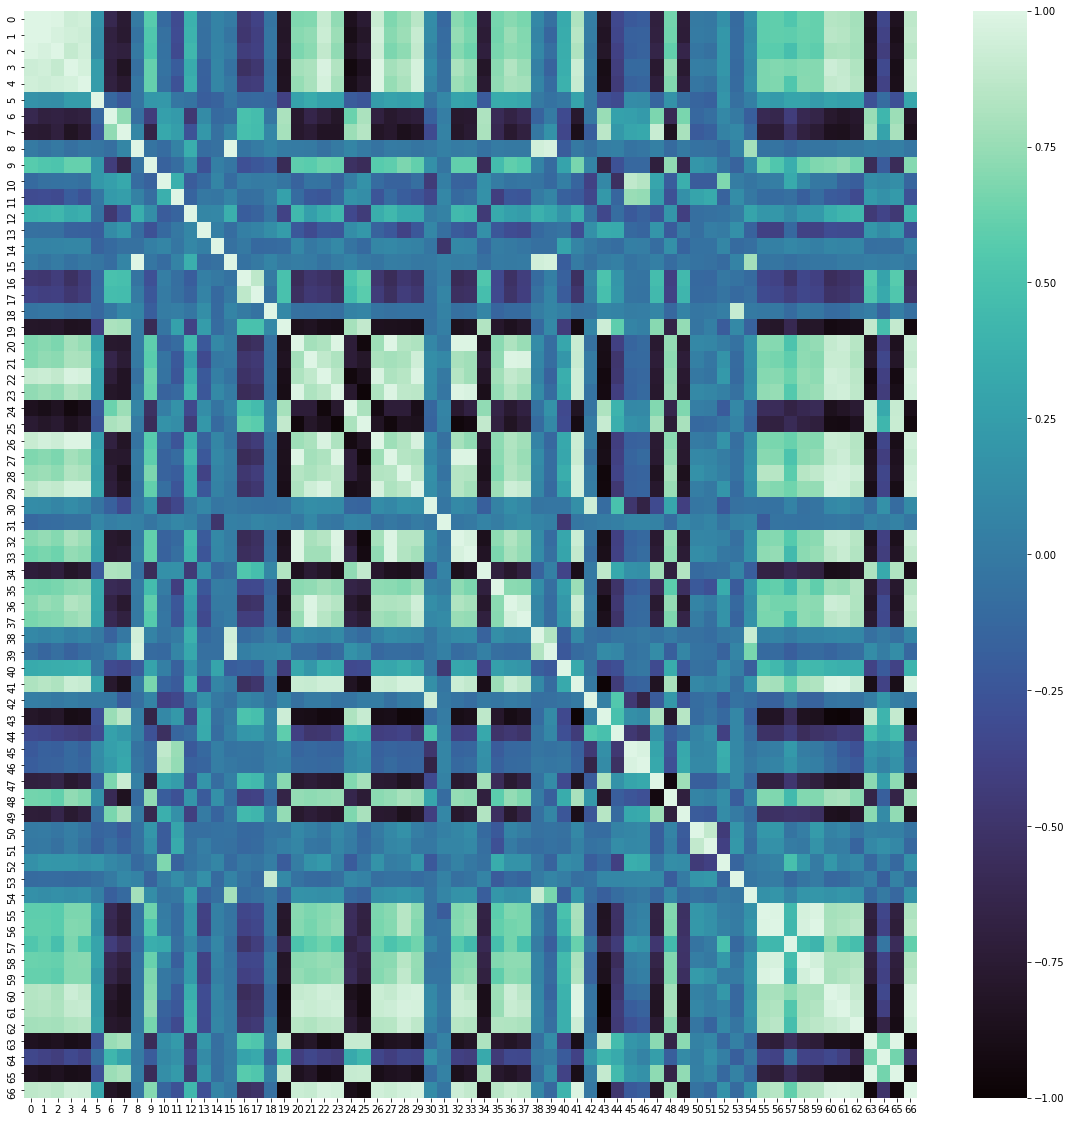

In [13]:
size = df_inicator_values.shape[1]
corr = df_inicator_values.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, xticklabels=range(size), yticklabels=range(size),cmap='mako')

In [14]:
percentage_columns = []
money_columns = []
index_columns = []
year_columns = []
rest = []

for column in df_inicator_values.columns.values:
    if '%' in column:
        percentage_columns.append(column)
    elif '$' in column:
        money_columns.append(column)
    elif 'years' in column:
        year_columns.append(column)
    elif 'index' in column.lower():
        index_columns.append(column)
    else:
        rest.append(column)

print(percentage_columns,'\n',len(percentage_columns))
print(money_columns,'\n',len(money_columns))
print(index_columns,'\n',len(index_columns))
print(year_columns,'\n',len(year_columns))
print(rest,'\n',len(rest))

print(len(percentage_columns)+len(money_columns)+len(index_columns)+len(year_columns)+len(rest))

['Population with at least some secondary education (% ages 25 and older)', 'Population with at least some secondary education, female (% ages 25 and older)', 'Population with at least some secondary education, male (% ages 25 and older)', 'Share of seats in parliament (% held by women)', 'Vulnerable employment (% of total employment)', 'Urban population (%)', 'Labour force participation rate (% ages 15 and older), female', 'Labour force participation rate (% ages 15 and older), male', 'Remittances, inflows (% of GDP)', 'Foreign direct investment, net inflows (% of GDP)', 'Infants lacking immunization, measles (% of one-year-olds)', 'Infants lacking immunization, DTP (% of one-year-olds)', 'Gross fixed capital formation (% of GDP)', 'Inequality in education (%)', 'Inequality in life expectancy (%)', 'Unemployment, youth (% ages 15?24)', 'Private capital flows (% of GDP)', 'Exports and imports (% of GDP)', 'Unemployment, total (% of labour force)', 'Youth not in school or employment (% 

### Dataframe is splitted

In [15]:
split_df1 = df_inicator_values[percentage_columns]
split_df2 = df_inicator_values[money_columns]
split_df3 = df_inicator_values[index_columns]
split_df4 = df_inicator_values[year_columns]
split_df5 = df_inicator_values[rest]

In [16]:
print('- Dataframe 1 -')
min1, max1 = print_missing_percentages(split_df1)
print('- Dataframe 2 -')
min2, max2 = print_missing_percentages(split_df2)
print('- Dataframe 3 -')
min3, max3 = print_missing_percentages(split_df3)
print('- Dataframe 4 -')
min4, max4 = print_missing_percentages(split_df4)
print('- Dataframe 5 -')
min5, max5 = print_missing_percentages(split_df5)

- Dataframe 1 -
Max, min and mean number of missing values for the columns
Max: 49.743589743589745 %
Min: 0.0 %
Mean: 14.624226348364278 %
- Dataframe 2 -
Max, min and mean number of missing values for the columns
Max: 8.717948717948717 %
Min: 2.051282051282051 %
Mean: 6.153846153846153 %
- Dataframe 3 -
Max, min and mean number of missing values for the columns
Max: 20.0 %
Min: 2.051282051282051 %
Mean: 9.790209790209792 %
- Dataframe 4 -
Max, min and mean number of missing values for the columns
Max: 10.76923076923077 %
Min: 1.0256410256410255 %
Mean: 5.584045584045584 %
- Dataframe 5 -
Max, min and mean number of missing values for the columns
Max: 22.05128205128205 %
Min: 0.0 %
Mean: 7.57396449704142 %


## Imputation of the individual datasets
### idf --> stands for imputed dataframe

[IterativeImputer] Completing matrix with shape (195, 29)
[IterativeImputer] Ending imputation round 1/49, elapsed time 0.08
[IterativeImputer] Change: 228.09157262466636, scaled tolerance: 0.381517 
[IterativeImputer] Ending imputation round 2/49, elapsed time 0.15
[IterativeImputer] Change: 62.25538442972473, scaled tolerance: 0.381517 
[IterativeImputer] Ending imputation round 3/49, elapsed time 0.21
[IterativeImputer] Change: 42.97964424882681, scaled tolerance: 0.381517 
[IterativeImputer] Ending imputation round 4/49, elapsed time 0.27
[IterativeImputer] Change: 32.49599901077046, scaled tolerance: 0.381517 
[IterativeImputer] Ending imputation round 5/49, elapsed time 0.40
[IterativeImputer] Change: 24.095208515105927, scaled tolerance: 0.381517 
[IterativeImputer] Ending imputation round 6/49, elapsed time 0.46
[IterativeImputer] Change: 31.682426801495314, scaled tolerance: 0.381517 
[IterativeImputer] Ending imputation round 7/49, elapsed time 0.52
[IterativeImputer] Change:

<AxesSubplot:>

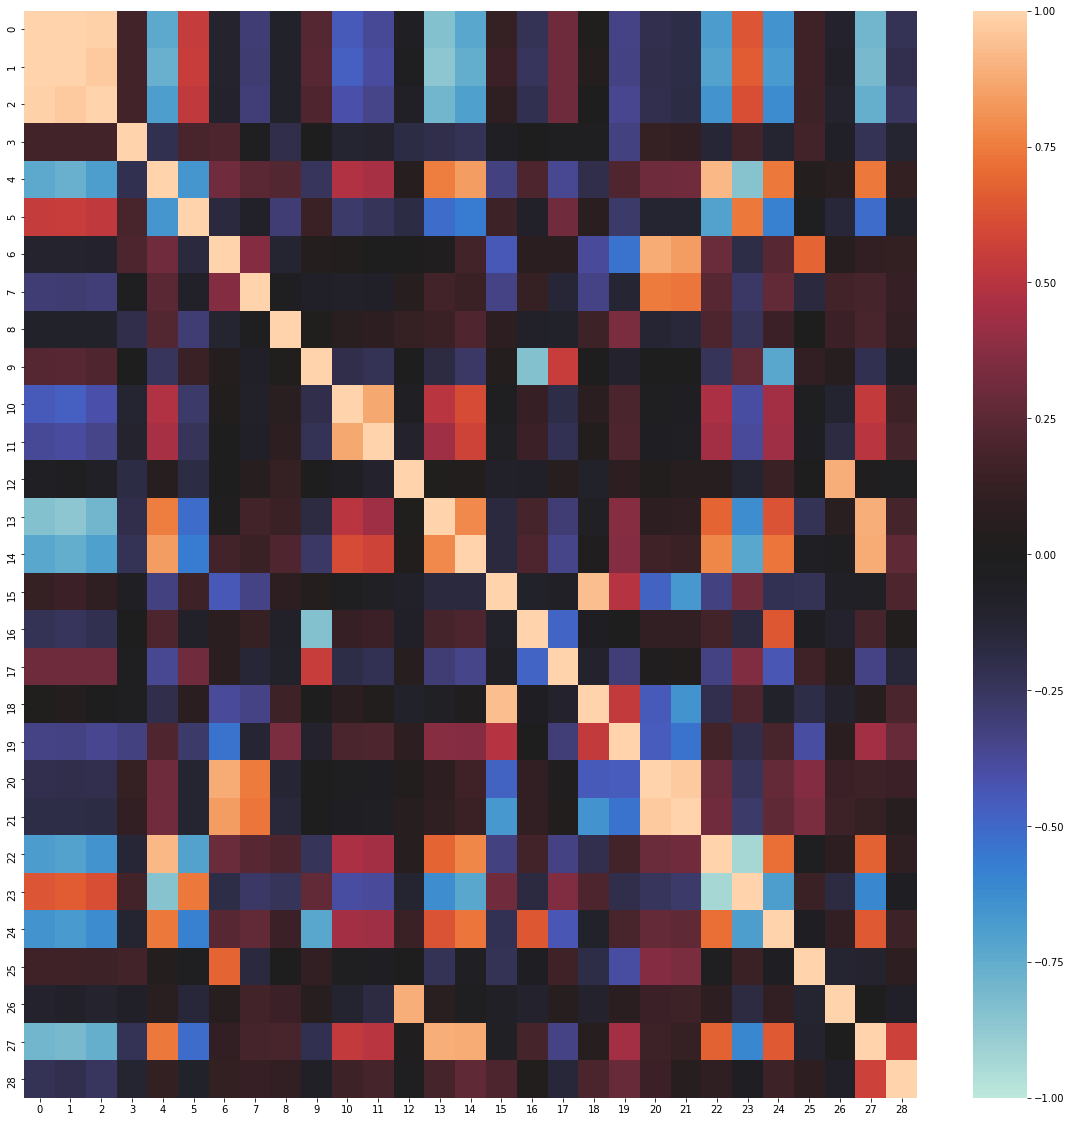

In [17]:
idf1 = impute_df(split_df1, max_iter= int(max1), verbose=2)
size = idf1.shape[1]
corr = idf1.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, xticklabels=range(size), yticklabels=range(size))

[IterativeImputer] Completing matrix with shape (195, 5)
[IterativeImputer] Ending imputation round 1/8, elapsed time 0.01
[IterativeImputer] Change: 457858.9943114285, scaled tolerance: 131.03159 
[IterativeImputer] Ending imputation round 2/8, elapsed time 0.02
[IterativeImputer] Change: 123566.60351871609, scaled tolerance: 131.03159 
[IterativeImputer] Ending imputation round 3/8, elapsed time 0.03
[IterativeImputer] Change: 66082.79555085694, scaled tolerance: 131.03159 
[IterativeImputer] Ending imputation round 4/8, elapsed time 0.05
[IterativeImputer] Change: 31356.06832177031, scaled tolerance: 131.03159 
[IterativeImputer] Ending imputation round 5/8, elapsed time 0.06
[IterativeImputer] Change: 13275.540026738847, scaled tolerance: 131.03159 
[IterativeImputer] Ending imputation round 6/8, elapsed time 0.07
[IterativeImputer] Change: 5607.778352352506, scaled tolerance: 131.03159 
[IterativeImputer] Ending imputation round 7/8, elapsed time 0.08
[IterativeImputer] Change: 46

<AxesSubplot:>

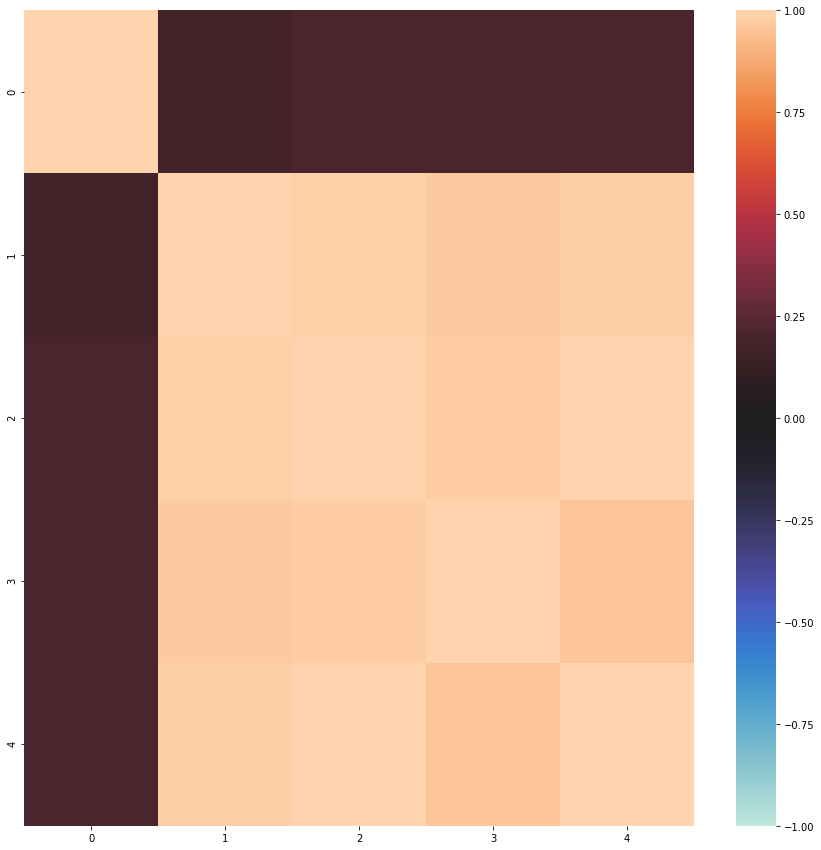

In [18]:
idf2 = impute_df(split_df2, max_iter= int(max2), verbose=2)
size = idf2.shape[1]
corr = idf2.corr()
fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, xticklabels=range(size), yticklabels=range(size))

[IterativeImputer] Completing matrix with shape (195, 11)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.02
[IterativeImputer] Change: 1.3057475071151101, scaled tolerance: 0.001036 
[IterativeImputer] Ending imputation round 2/20, elapsed time 0.04
[IterativeImputer] Change: 0.2431361335536576, scaled tolerance: 0.001036 
[IterativeImputer] Ending imputation round 3/20, elapsed time 0.06
[IterativeImputer] Change: 0.050910966788451084, scaled tolerance: 0.001036 
[IterativeImputer] Ending imputation round 4/20, elapsed time 0.08
[IterativeImputer] Change: 0.024727577272021295, scaled tolerance: 0.001036 
[IterativeImputer] Ending imputation round 5/20, elapsed time 0.10
[IterativeImputer] Change: 0.01669938231479373, scaled tolerance: 0.001036 
[IterativeImputer] Ending imputation round 6/20, elapsed time 0.12
[IterativeImputer] Change: 0.014436526598200827, scaled tolerance: 0.001036 
[IterativeImputer] Ending imputation round 7/20, elapsed time 0.14
[IterativeImpute

<AxesSubplot:>

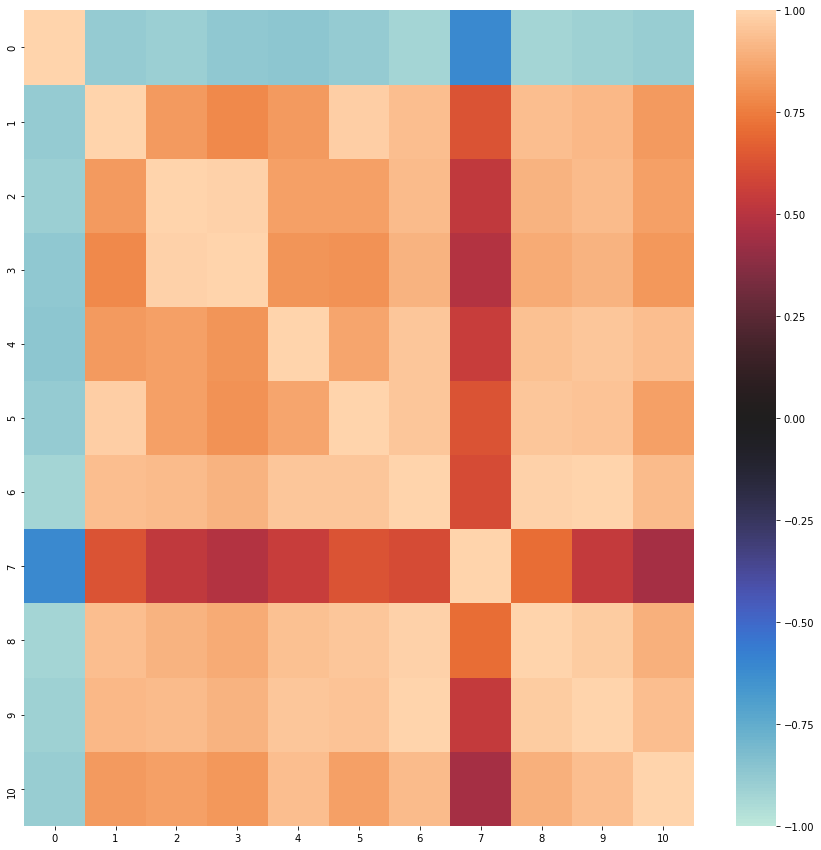

In [19]:
idf3 = impute_df(split_df3, max_iter= int(max3), verbose=2)
size = idf3.shape[1]
corr = idf3.corr()
fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, xticklabels=range(size), yticklabels=range(size))

[IterativeImputer] Completing matrix with shape (195, 9)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.02
[IterativeImputer] Change: 24.70630011052294, scaled tolerance: 0.087747 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.04
[IterativeImputer] Change: 3.081030825722686, scaled tolerance: 0.087747 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.05
[IterativeImputer] Change: 1.7974084139622217, scaled tolerance: 0.087747 
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.07
[IterativeImputer] Change: 1.2013063098503434, scaled tolerance: 0.087747 
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.08
[IterativeImputer] Change: 0.8709381898134296, scaled tolerance: 0.087747 
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.09
[IterativeImputer] Change: 0.6848017337664789, scaled tolerance: 0.087747 
[IterativeImputer] Ending imputation round 7/10, elapsed time 0.10
[IterativeImputer] Change:

<AxesSubplot:>

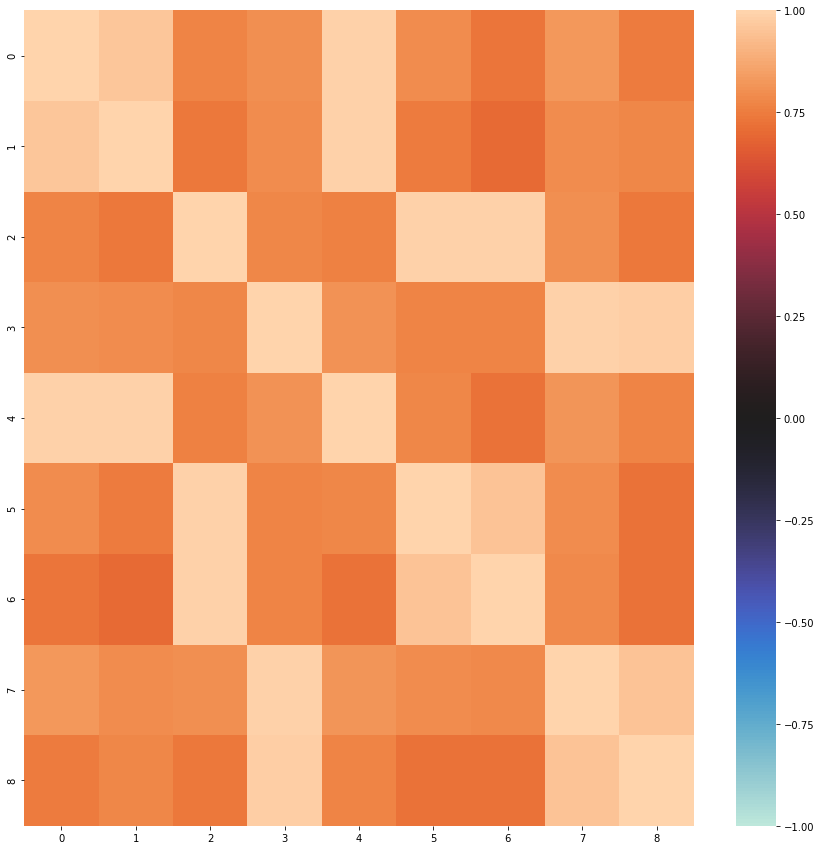

In [20]:
idf4 = impute_df(split_df4, max_iter= int(max4), verbose=2)
size = idf4.shape[1]
corr = idf4.corr()
fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, xticklabels=range(size), yticklabels=range(size))

[IterativeImputer] Completing matrix with shape (195, 13)
[IterativeImputer] Ending imputation round 1/22, elapsed time 0.03
[IterativeImputer] Change: 87.8605447830152, scaled tolerance: 1.4337840000000002 
[IterativeImputer] Ending imputation round 2/22, elapsed time 0.05
[IterativeImputer] Change: 28.586268171421256, scaled tolerance: 1.4337840000000002 
[IterativeImputer] Ending imputation round 3/22, elapsed time 0.07
[IterativeImputer] Change: 11.593324359484521, scaled tolerance: 1.4337840000000002 
[IterativeImputer] Ending imputation round 4/22, elapsed time 0.10
[IterativeImputer] Change: 5.237507958945714, scaled tolerance: 1.4337840000000002 
[IterativeImputer] Ending imputation round 5/22, elapsed time 0.12
[IterativeImputer] Change: 3.9889516059898855, scaled tolerance: 1.4337840000000002 
[IterativeImputer] Ending imputation round 6/22, elapsed time 0.13
[IterativeImputer] Change: 4.3327704567826295, scaled tolerance: 1.4337840000000002 
[IterativeImputer] Ending imputat

<AxesSubplot:>

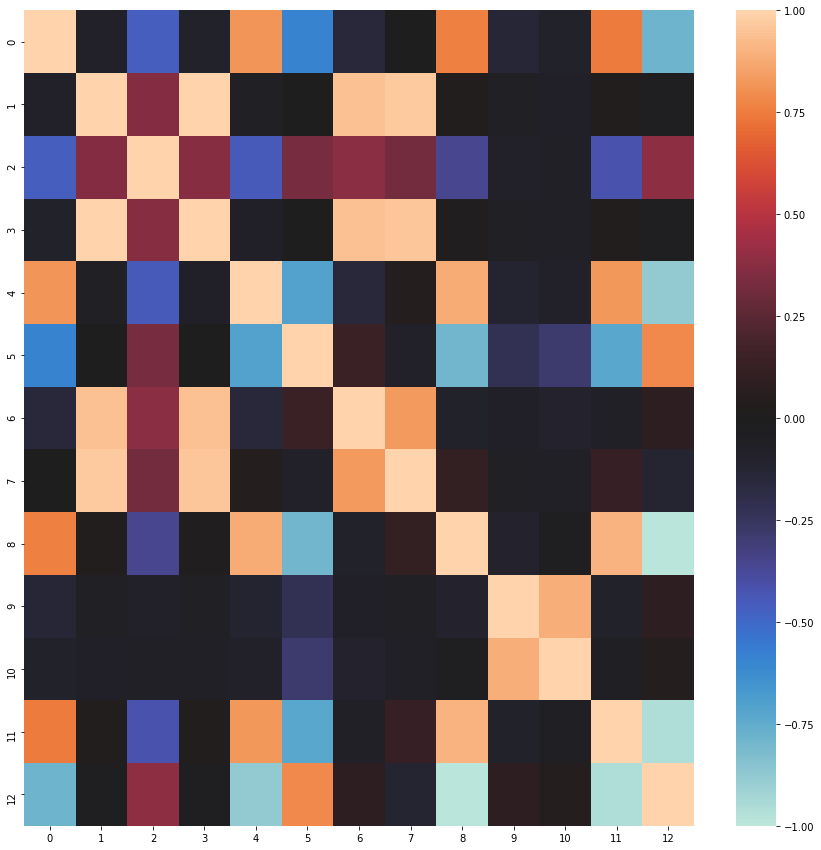

In [21]:
idf5 = impute_df(split_df5, max_iter= int(max5), verbose=2)
size = idf5.shape[1]
corr = idf5.corr()
fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, xticklabels=range(size), yticklabels=range(size))

# Imputation of the whole dataset 

In [22]:
iter_number = (max_missing + min_missing) // 2
print(iter_number)

24.0


In [23]:
imputed_df = impute_df(df_inicator_values, max_iter=int(iter_number), verbose=2)

[IterativeImputer] Completing matrix with shape (195, 67)
[IterativeImputer] Ending imputation round 1/24, elapsed time 0.62
[IterativeImputer] Change: 373997.8709645349, scaled tolerance: 131.03159 
[IterativeImputer] Ending imputation round 2/24, elapsed time 1.24
[IterativeImputer] Change: 29511.1061871246, scaled tolerance: 131.03159 
[IterativeImputer] Ending imputation round 3/24, elapsed time 1.85
[IterativeImputer] Change: 17873.188347295738, scaled tolerance: 131.03159 
[IterativeImputer] Ending imputation round 4/24, elapsed time 2.47
[IterativeImputer] Change: 11459.888077535514, scaled tolerance: 131.03159 
[IterativeImputer] Ending imputation round 5/24, elapsed time 3.09
[IterativeImputer] Change: 5390.9739547168065, scaled tolerance: 131.03159 
[IterativeImputer] Ending imputation round 6/24, elapsed time 3.71
[IterativeImputer] Change: 3757.0867210105503, scaled tolerance: 131.03159 
[IterativeImputer] Ending imputation round 7/24, elapsed time 4.34
[IterativeImputer] C

In [24]:
display(imputed_df)

,Population with at least some secondary education (% ages 25 and older),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)","Mean years of schooling, female (years)","Mean years of schooling, male (years)",Share of seats in parliament (% held by women),"Adolescent birth rate (births per 1,000 women ages 15-19)",Vulnerable employment (% of total employment),Total population (millions),Urban population (%),...,Gender Development Index (GDI),"Estimated gross national income per capita, female (2017 PPP $)","Estimated gross national income per capita, male (2017 PPP $)","Human Development Index (HDI), female","Human Development Index (HDI), male",Inequality-adjusted income index,Overall loss in HDI due to inequality (%),Inequality in income (%),Coefficient of human inequality,Inequality-adjusted HDI (IHDI)
AFG,26.080,13.220,36.920,1.94800,6.006000,27.244,68.957000,79.726000,38.042,25.8,...,0.659000,819.385000,3565.86500,0.391000,0.593000,0.590646,19.599171,-14.312061,19.795336,0.423465
AGO,30.232,23.133,38.056,4.02300,6.359000,30.000,150.526000,65.995000,31.825,66.2,...,0.903000,5205.049000,7022.23100,0.552000,0.611000,0.442000,31.670000,28.900000,31.733000,0.397000
ALB,93.174,93.700,92.497,9.70200,10.614000,29.508,19.642000,52.852000,2.881,61.2,...,0.967000,11004.455000,16884.66700,0.780000,0.807000,0.648000,10.943000,13.179000,10.893000,0.708000
AND,72.327,71.484,73.327,10.43900,10.564000,46.429,18.266334,4.461035,0.077,88.0,...,1.058332,43647.171247,66636.70046,0.888833,0.848604,0.657202,17.410515,36.120212,16.938070,0.735618
ARG,57.158,59.161,54.828,11.12300,10.729000,39.877,62.782000,21.805000,44.781,92.0,...,0.993000,14872.167000,27825.75700,0.835000,0.840000,0.606000,13.728000,25.159000,13.238000,0.729000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,74.942,79.127,71.583,11.16287,10.415249,10.000,23.886000,29.983000,0.197,18.1,...,0.949613,4054.375000,8410.10900,0.689133,0.723468,0.388513,18.988401,40.384439,18.427962,0.575112
YEM,28.020,19.920,36.918,2.88000,5.146000,0.971,60.352000,45.627000,29.162,37.3,...,0.488000,186.041000,2980.03500,0.270000,0.553000,0.327000,31.702000,21.800000,30.867000,0.321000
ZAF,75.478,74.977,78.207,10.03100,10.291000,45.333,67.908000,10.298000,58.558,66.9,...,0.986000,9247.751000,15094.54600,0.702000,0.712000,0.312000,33.992000,56.996000,31.163000,0.468000
ZMB,44.440,38.488,54.068,6.28300,8.176000,17.964,120.112000,78.134000,17.861,44.1,...,0.958000,3379.549000,3270.42200,0.569000,0.593000,0.292000,31.336000,44.840000,30.592000,0.401000


In [25]:
#scatter_matrix(imputed_df, figsize=(size, size)) Takes a lot of time to work, visualization is not that great. But it can stay, just in case

<AxesSubplot:>

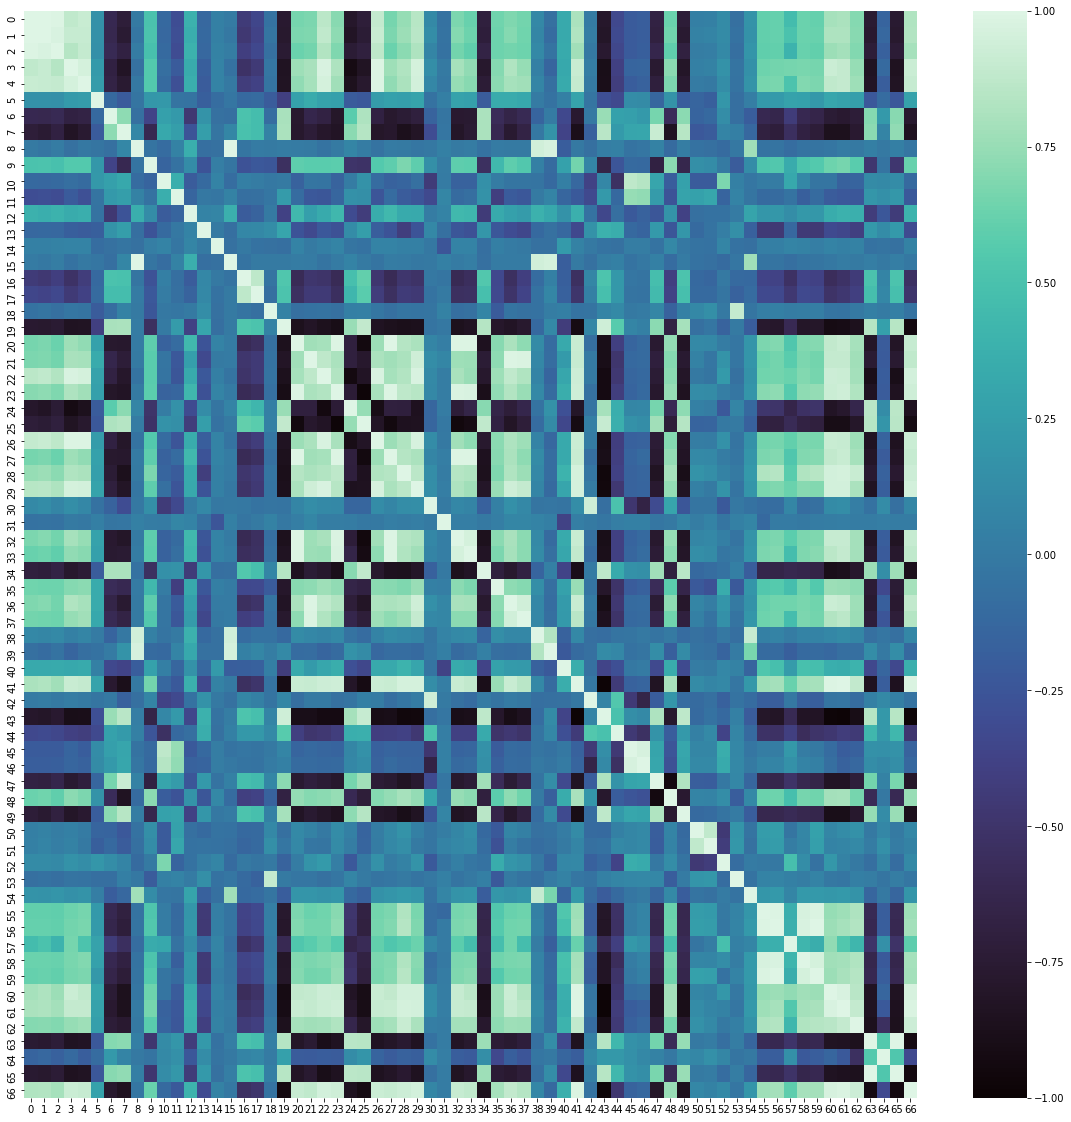

In [26]:
#sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, fmt='.1g', cmap= 'coolwarm', linewidths=1, linecolor='black', square=True, yticklabels=False, xticklabels=False)
size = imputed_df.shape[1]
corr = imputed_df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, xticklabels=range(size), yticklabels=range(size),cmap='mako')

In [27]:
map_columns = {}
count = 0
for col in imputed_df.columns:
    map_columns[count] = col
    count += 1

print(map_columns)

#Makes it easier to check the correlations

{0: 'Population with at least some secondary education (% ages 25 and older)', 1: 'Population with at least some secondary education, female (% ages 25 and older)', 2: 'Population with at least some secondary education, male (% ages 25 and older)', 3: 'Mean years of schooling, female (years)', 4: 'Mean years of schooling, male (years)', 5: 'Share of seats in parliament (% held by women)', 6: 'Adolescent birth rate (births per 1,000 women ages 15-19)', 7: 'Vulnerable employment (% of total employment)', 8: 'Total population (millions)', 9: 'Urban population (%)', 10: 'Labour force participation rate (% ages 15 and older), female', 11: 'Labour force participation rate (% ages 15 and older), male', 12: 'Sex ratio at birth (male to female births)', 13: 'Remittances, inflows (% of GDP)', 14: 'Foreign direct investment, net inflows (% of GDP)', 15: 'Population ages 15?64 (millions)', 16: 'Infants lacking immunization, measles (% of one-year-olds)', 17: 'Infants lacking immunization, DTP (% o

In [28]:
x = imputed_df.loc[:, imputed_df.columns].values
print(x)
x = StandardScaler().fit_transform(x)

[[ 26.08        13.22        36.92       ... -14.31206116  19.79533568
    0.42346498]
 [ 30.232       23.133       38.056      ...  28.9         31.733
    0.397     ]
 [ 93.174       93.7         92.497      ...  13.179       10.893
    0.708     ]
 ...
 [ 75.478       74.977       78.207      ...  56.996       31.163
    0.468     ]
 [ 44.44        38.488       54.068      ...  44.84        30.592
    0.401     ]
 [ 64.935       59.792       70.783      ...  28.769       22.525
    0.441     ]]


In [29]:
print(imputed_df.shape)
print(x.shape)

(195, 67)
(195, 67)


In [30]:
display(x)

array([[-1.213211  , -1.49949287, -0.95026927, ..., -3.68962647,
         0.08912291, -0.98754125],
       [-1.06825946, -1.17214393, -0.90913571, ...,  0.45316976,
         1.47092771, -1.13989063],
       [ 1.12912485,  1.15813273,  1.06212486, ..., -1.05402286,
        -0.94133748,  0.65042431],
       ...,
       [ 0.51133525,  0.53985833,  0.54469657, ...,  3.14676964,
         1.40494925, -0.73116921],
       [-0.57224033, -0.66508825, -0.32935532, ...,  1.98135819,
         1.33885503, -1.11686407],
       [ 0.14326588,  0.03841642,  0.27588008, ...,  0.44061062,
         0.40508616, -0.88659848]])

### We want to check if the mean of the normalized dataset is 0 and std is 1
### It looks like it

In [31]:
np.mean(x), np.std(x)

(-6.274693313304368e-17, 1.0)

### To show the normalized data

In [32]:
feat_cols = imputed_df.columns.values.tolist()
#print(feat_cols)
normalized_imputed_df = pd.DataFrame(x, columns=feat_cols)
normalized_imputed_df.head()

,Population with at least some secondary education (% ages 25 and older),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)","Mean years of schooling, female (years)","Mean years of schooling, male (years)",Share of seats in parliament (% held by women),"Adolescent birth rate (births per 1,000 women ages 15-19)",Vulnerable employment (% of total employment),Total population (millions),Urban population (%),...,Gender Development Index (GDI),"Estimated gross national income per capita, female (2017 PPP $)","Estimated gross national income per capita, male (2017 PPP $)","Human Development Index (HDI), female","Human Development Index (HDI), male",Inequality-adjusted income index,Overall loss in HDI due to inequality (%),Inequality in income (%),Coefficient of human inequality,Inequality-adjusted HDI (IHDI)
0,-1.213211,-1.499493,-0.950269,-1.941779,-1.112677,0.361897,0.532975,1.556274,-0.009236,-1.443911,...,-3.764694,-0.880471,-0.858135,-1.898855,-1.037358,0.259496,0.022060,-3.689626,0.089123,-0.987541
1,-1.068259,-1.172144,-0.909136,-1.318987,-0.984083,0.596509,2.562666,1.051012,-0.051786,0.299618,...,-0.482479,-0.605187,-0.720907,-0.901924,-0.907477,-0.644363,1.394523,0.453170,1.470928,-1.139891
2,1.129125,1.158133,1.062125,0.385514,0.565966,0.554626,-0.694136,0.567386,-0.249884,0.083835,...,0.378430,-0.241164,-0.329338,0.509877,0.506782,0.608240,-0.962154,-1.054023,-0.941337,0.650424
3,0.401330,0.424512,0.367996,0.606718,0.547752,1.995072,-0.728367,-1.213266,-0.269075,1.240433,...,1.606995,1.807789,1.645966,1.183786,0.806977,0.664195,-0.226792,1.145381,-0.241610,0.809411
4,-0.128239,0.017579,-0.301836,0.812015,0.607859,1.437315,0.379322,-0.575057,0.036887,1.413060,...,0.728174,0.001609,0.105056,0.850444,0.744897,0.352855,-0.645497,0.094515,-0.669900,0.771314


### Now we start with the PCA Part

In [33]:
num_components = 3
pca_imputed = PCA(n_components=num_components)
pComponents_imputed = pca_imputed.fit_transform(x)
component_col = ['PC'+str(i+1) for i in range(num_components)]
print(component_col)

percentage_list = [element * 100 for element in pca_imputed.explained_variance_ratio_]
percentage_list = ['%.2f' % elem for elem in percentage_list]
print(percentage_list)

['PC1', 'PC2', 'PC3']
['49.70', '7.85', '7.20']


### PC stands for principal components

In [34]:
pc_imputed_df = pd.DataFrame(data = pComponents_imputed, columns = component_col)
print(pc_imputed_df.shape)
pc_imputed_df.head()

(195, 3)


,PC1,PC2,PC3
0,7.815705,3.771093,-0.133255
1,7.339138,-2.606812,0.272919
2,-3.214204,2.176000,-0.611012
3,-5.807156,-1.477608,-0.284501
4,-3.974595,0.524419,-0.239346


In [35]:
print('Explained variation percentage per principal component: {}'.format(percentage_list))
total_explained_percentage = (sum(pca_imputed.explained_variance_ratio_)*100)
print('Total percentage of the explained data by',pca_imputed.n_components,'components is: %.2f' %total_explained_percentage)
print('Percentage of the information that is lost for using',pca_imputed.n_components,'components is: %.2f' %(100-total_explained_percentage))

Explained variation percentage per principal component: ['49.70', '7.85', '7.20']
Total percentage of the explained data by 3 components is: 64.75
Percentage of the information that is lost for using 3 components is: 35.25


### Outliers are a big problem as it can be seen from the graph

In [36]:
l_dict = {}
for i in range(len(percentage_list)):
    l_dict[str(i)] = 'PC'+str(i+1)+' '+str(percentage_list[i])+'%'

print(l_dict)

fig = px.scatter_3d(
    pComponents_imputed, x=0, y=1, z=2,
    title=f'Total Explained Variance: {total_explained_percentage:.2f}%',
    labels=l_dict
)

fig.show()

{'0': 'PC1 49.70%', '1': 'PC2 7.85%', '2': 'PC3 7.20%'}


In [37]:
imputed_df.to_csv("../data/unlabeled/preprocessed/hdro_preprocessed.csv")